<h1> Classification of Kathmandu and Lalitpur City  Wards <h1>

<h2> Introduction </h2>

Kathmandu and Lalitpur are two biggest cities of Nepal . Although being two different cities they are almost like a combined city for residents of these two metropolitian cities as  daily thousands of people cross these two cities for  their normal routine.

For this project we want to classify different wards of these two cities on the basis of venues  to study both city as one and look out the places which mirrors each other or acts as one unit . We are also taking look at the population density of these wards for detail information. This project would be really insightful for inhabitants who want to explore different wards of both cities on basis of their desire venues and population.

<h3> Target Audience </h3>
    
This research is targeted to an individual who wants to move or have to move inside Kathmandu and Lalitpur . A sound judgement could be make on where to move reagrding the his or her venues in interest and population density as dense populated area are generally expensive and noisy especially in city like Kathmandu and Lalitpur.

Real state agents would also be the target audience as this analysis would help them to narrow out the wards on basis of customer preference on venues and population density.


<h2> Data Collection</h2>

We need to collect data regarding different wards , their locations , population density , area for Kathmandu and Lalitpur city    

As we are collecting data for two cities Kathmandu and Lalitpur , we will at first individually collect data for each city and later merge them as a single dataset for two cities. Data for individual city are scrapped and collected from data provided from respective metropolitian city websites. As most data about wards areas, population and location were in Nepali langauge we have to translate it to English using google translate saved the site  and then scrap the data importing the saved site .


Later on we have to find latitude and longitude of wards by using location and geocoder library.
Venues details can be obtained from four square API for all wards.

hence our data sources can be summarise as :

1. Kathmandu Ward Offices Location (includes wards headoffices location)from http://www.kathmandu.gov.np/

2. Kathmandu Ward Profiles(includes area, population of wards) from http://www.kathmandu.gov.np/

3. Lalipur Wards Details (includes area, population of wards) from http://lalitpurmun.gov.np/en/node/4

4. Lalitpur Wards Offices Location  (includes wards headoffices location)from http://lalitpurmun.gov.np/en/node/4

5. Longitude and Latitude of Wards on basis of location from Geocoder library

7. Venues numbers and each categories for each wards from  Four Square API. (https://foursquare.com/developers/apps)

In [265]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
from geopy.geocoders import Nominatim
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import requests
from selenium import webdriver
import time

In [2]:
#Kathmandu Wards data
Wards_ktm=pd.read_csv('Ward offices of Kathmandu.csv')

In [3]:
Wards_ktm.head()

,Ward_Office,Ward,City
0,Naxal,Ward 1,Kathmandu
1,Lazimpat,Ward 2,Kathmandu
2,Maharajgunj,Ward 3,Kathmandu
3,"Baluwatar,",Ward 4,Kathmandu
4,Tangal,Ward 5,Kathmandu


In [4]:
#using geoloctaer to get Wards latitude ad longitude on basis of location in Wards
latitude=[]
longitude=[]
for i,j in zip(Wards_ktm.Ward_Office,Wards_ktm.City):
    
    
    address = str(i) + ' ' + ','+' '+ str(j)
   
    
        

    geolocator = Nominatim(user_agent="ny_explorer")
    try:
        
        location = geolocator.geocode(address)
    
        
    
        
    except:
        latitude.append(0)
        longitude.append(0)
    else:
       
        
        try:
            
            
            
            
            latitude.append(location.latitude)
            longitude.append(location.longitude)
            
        except:
            
            
            latitude.append(0)
            longitude.append(0)
            
        
        


In [5]:
Wards_ktm['latitude']=latitude
Wards_ktm['longitude']=longitude

In [232]:
#Manually passing missing longitude and latitude values
Wards_ktm.iloc[10,3:5]=[27.6950,85.3149]
Wards_ktm.iloc[11,3:5]=[27.6954,85.3039]
Wards_ktm.iloc[20,3:5]=[27.6984,85.3078]
Wards_ktm.iloc[23,3:5]=[27.7055,85.3089]
Wards_ktm.iloc[24,3:5]=[27.7082,85.3099]
Wards_ktm.iloc[22,3:5]=[27.7015,85.3080]
Wards_ktm.iloc[27,3:5]=[27.7053,85.3149]
Wards_ktm.iloc[19,3:5]=[27.7030,85.3036]
Wards_ktm.iloc[18,3:5]=[27.7056,85.3061]
Wards_ktm.iloc[31,3:5]=[27.679087,85.347599]

In [233]:
Wards_ktm.head()

,Ward_Office,Ward,City,latitude,longitude
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449


In [8]:
#scrapping wards population  from Kathmadnu Metropolitian site using selenium
from selenium import webdriver
driver=webdriver.Chrome()

In [9]:
Ward=[]
Population=[]
Ward.append('Ward 1')
Ward.append('Ward 2')
Population.append('8008')
Population.append('13448')

for i,j in enumerate(range(98,128)):
    
    
    if j<=105:
        
        
        
        
        driver.get(f"http://www.kathmandu.gov.np/en/node/{j}")
 
        
    
    else:
        
        
        driver.get(f"http://www.kathmandu.gov.np/en/node/{j+1}")
 
        
    
    time.sleep(5)
    
        
    
    popn=driver.find_element_by_xpath('//div[@class="field-items"]')
    
    c=3+i
    Ward.append(f'Ward {c}')
    Population.append(popn.text)

In [10]:
Ward_popn_ktm=pd.DataFrame()
Ward_popn_ktm['Ward']=Ward
Ward_popn_ktm['Population']=Population

In [11]:
Ward_popn_ktm.iloc[23,1]='7619'

In [234]:
Ward_popn_ktm.head()

,Ward,Population
0,Ward 1,8008
1,Ward 2,13448
2,Ward 3,34866
3,Ward 4,47362
4,Ward 5,18320


In [13]:
#joining Kathmandu Wards with respective population 
ktm_Wards_=Wards_ktm.join(Ward_popn_ktm.set_index('Ward'), on='Ward')

In [235]:
#importing area of each Kathmandu Ward
ktm_area=pd.read_csv('Kathmandu_fire_study.csv')

In [236]:
ktm_area.head()

,Ward,Ward_Area(km2)
0,1,1.3818
1,2,0.8181
2,3,3.0854
3,4,3.3498
4,5,0.7875


In [16]:
ktm_Wards_['Ward_Area(km2)']=ktm_area['Ward_Area(km2)  ']

In [237]:
ktm_Wards_.head()

,Location,Ward,City,latitude,longitude,Area(sq km),Population Density (per sq km)
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,1.3818,5795.0
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,0.8181,16438.0
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,3.0854,11300.0
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,3.3498,14139.0
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,0.7875,23263.0


In [18]:
#Merging consequent Wards with areas less than 0.5
ktm_Wards_.iloc[12]=['Kalimati','Ward 12 and 13','Kathmandu',27.698583,85.299157,53718,2.7843]
ktm_Wards_.iloc[17]=['Bhimsenthan','Ward 18,19,20,21','Kathmandu',27.703000,85.303600,46152,0.6416]
ktm_Wards_.iloc[18]=['Om Bahal','Ward 22,23,24,25','Kathmandu',27.701500,85.308000,38366,0.6624]
ktm_Wards_.iloc[25]=['Lainchaur','Ward 26 and 27','Kathmandu',27.719410,85.315162,53615,2.2303]

In [19]:
#filtering out wards with less than 0.5 km sq area
ktm_Wards_=ktm_Wards_[ktm_Wards_['Ward_Area(km2)']>0.5]
ktm_Wards_.reset_index(inplace=True)
ktm_Wards_.drop('index',axis=1,inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [238]:
ktm_Wards_.head()

,Location,Ward,City,latitude,longitude,Area(sq km),Population Density (per sq km)
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,1.3818,5795.0
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,0.8181,16438.0
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,3.0854,11300.0
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,3.3498,14139.0
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,0.7875,23263.0


In [21]:
#Calculating Population Density
ktm_Wards_['Population']=ktm_Wards_['Population'].astype('float')
ktm_Wards_['Ward_Area(km2)']=ktm_Wards_['Ward_Area(km2)'].astype('float')
ktm_Wards_['Population Density (per sq km)']=round(ktm_Wards_['Population']/ktm_Wards_['Ward_Area(km2)'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [22]:
ktm_Wards_.drop('Population',axis=1,inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
ktm_Wards_.columns=['Location', 'Ward', 'City', 'latitude', 'longitude',
       'Area(sq km)', 'Population Density (per sq km)']

In [24]:
Kathmandu=ktm_Wards_

In [239]:
Kathmandu.head()

,Location,Ward,City,latitude,longitude,Area(sq km),Population Density (per sq km)
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,1.3818,5795.0
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,0.8181,16438.0
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,3.0854,11300.0
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,3.3498,14139.0
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,0.7875,23263.0


In [26]:
#site for Lalitpur wards offices location data
base_site='http://lalitpurmun.gov.np/ne/node/82'




In [27]:
#importing data from saved translated site
table=pd.read_html('Ward Offices _ Lalitpur Municipal Corporation.html')

In [28]:
table=table[0]

In [240]:
table.head()

,Vada no.,Secretary,Office assistant,Social worker,Why? Phone no.,Mobile no.,The place where the office is located
0,1,Mr. Renuka Dawadi,Ichcha Bahadur Maharjan,Sunita Kapali,5520209,"9841521555, 9849394601",Gusingal
1,2,Mr. Prem Narayan Khanal,Krishna Basnet,Sanu Maharjan,5536486,"9841493852, 9849394602",Sanepa
2,3,Mr. Reena Maharjan,Chandralal Shrestha,Amita Maharjan,5528188,"9841701685, 9849394603",Pulchowk
3,4,Mr. Virendra Maharjan,Shiva Jeet Kunwar,Junu Thapa,5521031,"9841385192, 9849394604",Jawalakhel
4,5,Mr. Mukunda Ranjit,Krishna Ram Shrestha,Sangeeta Maharjan,5004075,"9841261976, 9849394605",Lagankhel


In [30]:

Lalitpur=pd.DataFrame()
Lalitpur['Ward']=[f'Ward {x}' for x in np.arange(1,30)]
Lalitpur['Location']=table['The place where the office is located']

In [31]:
Lalitpur['City']=['Lalitpur' for x in range(1,30)]

In [32]:
Lalitpur

,Ward,Location,City
0,Ward 1,Gusingal,Lalitpur
1,Ward 2,Sanepa,Lalitpur
2,Ward 3,Pulchowk,Lalitpur
3,Ward 4,Jawalakhel,Lalitpur
4,Ward 5,Lagankhel,Lalitpur
5,Ward 6,कनिवाहल,Lalitpur
6,Ward 7,पिलाछें,Lalitpur
7,Ward 8,Guitol,Lalitpur
8,Ward 9,Bholdhoka,Lalitpur
9,Ward 10,Kupandol,Lalitpur


In [33]:
#fixing poor translation from google
Lalitpur.iloc[5,1]='Kanibahal'
Lalitpur.iloc[6,1]='Pilachen'
Lalitpur.iloc[10,1]='Patan'
Lalitpur.iloc[15,1]='Dhapaghal'
Lalitpur.iloc[16,1]='Tyagal'
Lalitpur.iloc[18,1]='Daubahal'
Lalitpur.iloc[20,1]='Khokhana'
Lalitpur.iloc[24,1]='Bhaisepati'
Lalitpur.iloc[9,1]='Kupandole'
Lalitpur.iloc[19,1]='Khwaayahi'
Lalitpur.iloc[14,1]='Satdobato'
Lalitpur.iloc[17,1]='Sainbhu'
Lalitpur.iloc[8,1]='Bhol Dhoka'



In [34]:
Lalitpur

,Ward,Location,City
0,Ward 1,Gusingal,Lalitpur
1,Ward 2,Sanepa,Lalitpur
2,Ward 3,Pulchowk,Lalitpur
3,Ward 4,Jawalakhel,Lalitpur
4,Ward 5,Lagankhel,Lalitpur
5,Ward 6,Kanibahal,Lalitpur
6,Ward 7,Pilachen,Lalitpur
7,Ward 8,Guitol,Lalitpur
8,Ward 9,Bhol Dhoka,Lalitpur
9,Ward 10,Kupandole,Lalitpur


In [35]:
#importing population data from translated saved html from Lalitpur government site 
Table=pd.read_html('Factual Information _ Lalitpur Municipal Corporation.html')

            
        
        


In [36]:
Lalitpur['Population density (per sq km)']=list(Table[0].iloc[1:30,5])
Lalitpur['Area (sq km)']=list(Table[0].iloc[1:30,6])

In [37]:
Lalitpur

,Ward,Location,City,Population density (per sq km),Area (sq km)
0,Ward 1,Gusingal,Lalitpur,17533,0.481
1,Ward 2,Sanepa,Lalitpur,17148,1.1115
2,Ward 3,Pulchowk,Lalitpur,8522,1.6523
3,Ward 4,Jawalakhel,Lalitpur,7538,2.0386
4,Ward 5,Lagankhel,Lalitpur,8387,0.7635
5,Ward 6,Kanibahal,Lalitpur,27950,0.2426
6,Ward 7,Pilachen,Lalitpur,37417,0.2098
7,Ward 8,Guitol,Lalitpur,23845,0.4781
8,Ward 9,Bhol Dhoka,Lalitpur,18146,0.7677
9,Ward 10,Kupandole,Lalitpur,8602,0.7619


In [38]:
#merging wards with less than 0.5 sq km area
Lalitpur.iloc[5,:]=['Ward 6, 7 and 8','Kanibahal','Lalitpur',89212,0.9305]
Lalitpur.iloc[22,:]=['Ward 23 and 24','Dhapakhel','Lalitpur',7342,3.6718]
Lalitpur.drop([6,7],inplace=True)
Lalitpur.drop([23],inplace=True)
Lalitpur.reset_index(inplace=True)
Lalitpur.drop('index',axis=1,inplace=True)
        
        
        
    
        

In [39]:
#calculating Population density
Lalitpur['Area (sq km)']=Lalitpur['Area (sq km)'].astype(float)
Lalitpur['Population density (per sq km)']=Lalitpur['Population density (per sq km)'].astype(float)

In [40]:
#filtering out wards with small area
Lalitpur=Lalitpur[Lalitpur['Area (sq km)']>=0.750]
Lalitpur.reset_index(inplace=True)
Lalitpur.drop('index',axis=1,inplace=True)


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
Lalitpur

,Ward,Location,City,Population density (per sq km),Area (sq km)
0,Ward 2,Sanepa,Lalitpur,17148.0,1.1115
1,Ward 3,Pulchowk,Lalitpur,8522.0,1.6523
2,Ward 4,Jawalakhel,Lalitpur,7538.0,2.0386
3,Ward 5,Lagankhel,Lalitpur,8387.0,0.7635
4,"Ward 6, 7 and 8",Kanibahal,Lalitpur,89212.0,0.9305
5,Ward 9,Bhol Dhoka,Lalitpur,18146.0,0.7677
6,Ward 10,Kupandole,Lalitpur,8602.0,0.7619
7,Ward 13,Kusunti,Lalitpur,19788.0,0.7513
8,Ward 14,Nakhipot,Lalitpur,12341.0,1.7205
9,Ward 15,Satdobato,Lalitpur,6076.0,2.2807


In [42]:
#importing Lalitpur wards longitudes and latitudes from geolocater
latitude=[]
longitude=[]
for i,j in zip(Lalitpur.Location,Lalitpur.City):
    
    
    address = str(i) + ' ' + ','+' '+ str(j)
   
    
        

    geolocator = Nominatim(user_agent="ny_explorer")
    try:
        
        location = geolocator.geocode(address)
    
        
    
        
    except:
        latitude.append(0)
        longitude.append(0)
    else:
       
        
        try:
            
            
            
            
            latitude.append(location.latitude)
            longitude.append(location.longitude)
            
        except:
            
            
            latitude.append(0)
            longitude.append(0)
            
        
        


In [43]:
Lalitpur['latitude']=latitude
Lalitpur['longitude']=longitude

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
Lalitpur

,Ward,Location,City,Population density (per sq km),Area (sq km),latitude,longitude
0,Ward 2,Sanepa,Lalitpur,17148.0,1.1115,27.683772,85.309353
1,Ward 3,Pulchowk,Lalitpur,8522.0,1.6523,27.678357,85.320608
2,Ward 4,Jawalakhel,Lalitpur,7538.0,2.0386,27.672440,85.313376
3,Ward 5,Lagankhel,Lalitpur,8387.0,0.7635,27.666873,85.323636
4,"Ward 6, 7 and 8",Kanibahal,Lalitpur,89212.0,0.9305,27.666727,85.328007
5,Ward 9,Bhol Dhoka,Lalitpur,18146.0,0.7677,0.000000,0.000000
6,Ward 10,Kupandole,Lalitpur,8602.0,0.7619,0.000000,0.000000
7,Ward 13,Kusunti,Lalitpur,19788.0,0.7513,27.663912,85.314897
8,Ward 14,Nakhipot,Lalitpur,12341.0,1.7205,27.650393,85.320765
9,Ward 15,Satdobato,Lalitpur,6076.0,2.2807,27.657521,85.325056


In [45]:
Lalitpur.iloc[11,5:7]=[27.6431,85.2955]
Lalitpur.iloc[5,5:7]=[27.6714,85.3324]
Lalitpur.iloc[6,5:7]=[27.6862,85.3149]
Lalitpur.iloc[10,5:7]=[27.6493,85.3059]
Lalitpur.iloc[15,5:7]=[27.6428,85.3173]
Lalitpur.iloc[17,5:7]=[27.64304,85.3478]
Lalitpur.iloc[18,5:7]=[27.6338,85.3419]
Lalitpur.iloc[14,5:7]=[27.622912,85.3103]



C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
Lalitpur

,Ward,Location,City,Population density (per sq km),Area (sq km),latitude,longitude
0,Ward 2,Sanepa,Lalitpur,17148.0,1.1115,27.683772,85.309353
1,Ward 3,Pulchowk,Lalitpur,8522.0,1.6523,27.678357,85.320608
2,Ward 4,Jawalakhel,Lalitpur,7538.0,2.0386,27.672440,85.313376
3,Ward 5,Lagankhel,Lalitpur,8387.0,0.7635,27.666873,85.323636
4,"Ward 6, 7 and 8",Kanibahal,Lalitpur,89212.0,0.9305,27.666727,85.328007
5,Ward 9,Bhol Dhoka,Lalitpur,18146.0,0.7677,27.671400,85.332400
6,Ward 10,Kupandole,Lalitpur,8602.0,0.7619,27.686200,85.314900
7,Ward 13,Kusunti,Lalitpur,19788.0,0.7513,27.663912,85.314897
8,Ward 14,Nakhipot,Lalitpur,12341.0,1.7205,27.650393,85.320765
9,Ward 15,Satdobato,Lalitpur,6076.0,2.2807,27.657521,85.325056


In [47]:
Lalitpur.columns=['Ward', 'Location', 'City', 'Population Density (per sq km)',
       'Area(sq km)', 'latitude', 'longitude']

In [48]:
Lalitpur_=Lalitpur[['Location', 'Ward', 'City', 'latitude', 'longitude',
       'Area(sq km)', 'Population Density (per sq km)']]

In [50]:
#merging Kathmandu and Lalitpur data
ktm_Lalitpur=pd.concat([Kathmandu,Lalitpur_])

In [51]:
ktm_Lalitpur

,Location,Ward,City,latitude,longitude,Area(sq km),Population Density (per sq km)
0,Naxal,Ward 1,Kathmandu,27.712678,85.328703,1.3818,5795.0
1,Lazimpat,Ward 2,Kathmandu,27.721508,85.320765,0.8181,16438.0
2,Maharajgunj,Ward 3,Kathmandu,27.733079,85.328807,3.0854,11300.0
3,"Baluwatar,",Ward 4,Kathmandu,27.724603,85.331017,3.3498,14139.0
4,Tangal,Ward 5,Kathmandu,27.717231,85.330449,0.7875,23263.0
5,Bouddha,Ward 6,Kathmandu,27.722053,85.362081,3.6078,16726.0
6,Mitrapark,Ward 7,Kathmandu,27.713360,85.345041,1.7481,29507.0
7,Jayabageshwori,Ward 8,Kathmandu,27.710336,85.344025,2.9181,3680.0
8,Gaushala,Ward 9,Kathmandu,27.709706,85.346409,2.9378,13742.0
9,New Baneshwor,Ward 10,Kathmandu,27.692621,85.338072,1.5643,25455.0


In [52]:
#Plotting Wards of Kathmandu and Lalitpur

map_kl=folium.Map(location=[27.6588,85.3247],zoom_start=12.1)

for lat,long,name in zip(ktm_Lalitpur.latitude,ktm_Lalitpur.longitude,ktm_Lalitpur.Location):
    label=f'{name}'
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,long],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='blue',
    fill_opacity='0.5',
    parse_html=True).add_to(map_kl)
    
map_kl

<h3>Venues from four square

In [53]:
#Foursquare credintials
CLIENT_ID = 'XAMDSTSJ0E253OZWENZBxxxxxx' # Foursquare ID(hidden for privacy)
CLIENT_SECRET = 'PH2XxxxxxxxxA50ZMQ1GZCHTFX3PAB' # Foursquare Secret ID(hidden for privacy)
VERSION = '20200525'

In [54]:
#Function to get venues of wards on basis of their location
def getnearbyvenues(n_name,n_city,n_lat,n_long,area):

    venues_list=[]
    for n_name,n_city,n_lat,n_long,area in zip (n_name,n_city,n_lat,n_long,area):
        Radius=round(((float(area)/3.1416)**0.5)*1000)
        
        
        url=f'https://api.foursquare.com/v2/venues/explore?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&ll={n_lat},{n_long}&v={20180225}&radius={Radius}&limit={100}'
        results=requests.get(url).json()['response']['groups'][0]['items']
        venues_list.append([(n_name,n_city,n_lat,n_long,
                           v['venue']['name'],
                           v['venue']['location']['lat'],
                           v['venue']['location']['lng'],
                           v['venue']['categories'][0]['name'])for v in results])
        
    nearby_venues=pd.DataFrame(item for venue_list in venues_list for item in venue_list)
    
    return nearby_venues

In [55]:
Ktm_L_venues=getnearbyvenues(ktm_Lalitpur['Ward'],ktm_Lalitpur['City'],ktm_Lalitpur['latitude'],ktm_Lalitpur['longitude'],ktm_Lalitpur['Area(sq km)'])

In [56]:
Ktm_L_venues.columns=['Ward','City','Latitude','Longitude','Venue','Venue_Latitude','Venue_Longitude','Venue_Category']

In [242]:
Ktm_L_venues.head()

,Ward,City,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Ward 1,Kathmandu,27.712678,85.328703,Wunjala Moskva,27.714212,85.328233,Restaurant
1,Ward 1,Kathmandu,27.712678,85.328703,Oriental Kitchen,27.718292,85.330758,Asian Restaurant
2,Ward 1,Kathmandu,27.712678,85.328703,Attic Bar,27.717159,85.331204,Bar
3,Ward 1,Kathmandu,27.712678,85.328703,imago dei,27.716194,85.325031,Food
4,Ward 1,Kathmandu,27.712678,85.328703,Brian's Grill House,27.708351,85.327781,American Restaurant


In [243]:
#groupping venues by wards 
Venues_ktm_L=Ktm_L_venues.groupby(['City','Ward']).count()
Venues_ktm_L.head()

Latitude  Longitude  Venue  Venue_Latitude  \
City      Ward                                                         
Kathmandu Ward 1                14         14     14              14   
          Ward 10                9          9      9               9   
          Ward 11               24         24     24              24   
          Ward 12 and 13        15         15     15              15   
          Ward 14                3          3      3               3   

                          Venue_Longitude  Venue_Category  
City      Ward                                             
Kathmandu Ward 1                       14              14  
          Ward 10                       9               9  
          Ward 11                      24              24  
          Ward 12 and 13               15              15  
          Ward 14                       3               3

In [59]:
#Sorting Kathmandu and Lalitpur wards data 
ktm_llt=ktm_Lalitpur.sort_values(by=['City','Ward'])
ktm_llt.reset_index(inplace=True)
ktm_llt.drop(['index'],axis=1,inplace=True)


In [245]:
ktm_llt.head()

,,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,Location,latitude,longitude,Area(sq km),Population Density (per sq km)
Ward,City,,,,,,,,,,,
Ward 1,Kathmandu,14,14,14,14,14,14,Naxal,27.712678,85.328703,1.3818,5795.0
Ward 10,Kathmandu,9,9,9,9,9,9,New Baneshwor,27.692621,85.338072,1.5643,25455.0
Ward 11,Kathmandu,24,24,24,24,24,24,Tripureshwor,27.695000,85.314900,1.8126,9801.0
Ward 12 and 13,Kathmandu,15,15,15,15,15,15,Kalimati,27.698583,85.299157,2.7843,19293.0
Ward 14,Kathmandu,3,3,3,3,3,3,Kalanki,27.693298,85.281653,3.4651,16881.0


In [62]:
#merging number of venues data with Kathmandu and Lalitpur data
ktm_llt=Venues_ktm_L.merge(ktm_llt.set_index(['Ward','City']), on=['Ward','City'])

In [246]:
ktm_llt.head()

,,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,Location,latitude,longitude,Area(sq km),Population Density (per sq km)
Ward,City,,,,,,,,,,,
Ward 1,Kathmandu,14,14,14,14,14,14,Naxal,27.712678,85.328703,1.3818,5795.0
Ward 10,Kathmandu,9,9,9,9,9,9,New Baneshwor,27.692621,85.338072,1.5643,25455.0
Ward 11,Kathmandu,24,24,24,24,24,24,Tripureshwor,27.695000,85.314900,1.8126,9801.0
Ward 12 and 13,Kathmandu,15,15,15,15,15,15,Kalimati,27.698583,85.299157,2.7843,19293.0
Ward 14,Kathmandu,3,3,3,3,3,3,Kalanki,27.693298,85.281653,3.4651,16881.0


In [64]:
#filtering out wards with venues less than 5 
ktm_l=ktm_llt[ktm_llt['Venue_Category']>=5]

In [66]:
ktm_l.reset_index(inplace=True)


In [67]:
ktm_l=ktm_l[['Ward','City','Area(sq km)','latitude','longitude']]

In [69]:
#merging only those wards with thier venues who has more than 5 venues
Ktm_L_Venues=Ktm_L_venues.merge(ktm_l.set_index(['Ward','City']), on=['Ward','City'])

In [70]:
Ktm_L_Venues

,Ward,City,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,Area(sq km),latitude,longitude
0,Ward 1,Kathmandu,27.712678,85.328703,Wunjala Moskva,27.714212,85.328233,Restaurant,1.3818,27.712678,85.328703
1,Ward 1,Kathmandu,27.712678,85.328703,Oriental Kitchen,27.718292,85.330758,Asian Restaurant,1.3818,27.712678,85.328703
2,Ward 1,Kathmandu,27.712678,85.328703,Attic Bar,27.717159,85.331204,Bar,1.3818,27.712678,85.328703
3,Ward 1,Kathmandu,27.712678,85.328703,imago dei,27.716194,85.325031,Food,1.3818,27.712678,85.328703
4,Ward 1,Kathmandu,27.712678,85.328703,Brian's Grill House,27.708351,85.327781,American Restaurant,1.3818,27.712678,85.328703
...,...,...,...,...,...,...,...,...,...,...,...
558,Ward 18,Lalitpur,27.649300,85.305900,Walter's Mitho Mitho,27.650458,85.305601,German Restaurant,2.0056,27.649300,85.305900
559,Ward 18,Lalitpur,27.649300,85.305900,Himalayan Grace Coffee,27.653728,85.304570,Coffee Shop,2.0056,27.649300,85.305900
560,Ward 18,Lalitpur,27.649300,85.305900,Jireh,27.652843,85.302376,Pizza Place,2.0056,27.649300,85.305900
561,Ward 18,Lalitpur,27.649300,85.305900,Tirupati Cafe And Restaurant,27.654207,85.304968,Restaurant,2.0056,27.649300,85.305900


In [248]:
#grouping wards to get venues numbers 
Venues_Ktm_L=Ktm_L_Venues.groupby(['City','Ward']).count()
Venues_Ktm_L.head()

Latitude  Longitude  Venue  Venue_Latitude  \
City      Ward                                                         
Kathmandu Ward 1                14         14     14              14   
          Ward 10                9          9      9               9   
          Ward 11               24         24     24              24   
          Ward 12 and 13        15         15     15              15   
          Ward 16               31         31     31              31   

                          Venue_Longitude  Venue_Category  Area(sq km)  \
City      Ward                                                           
Kathmandu Ward 1                       14              14           14   
          Ward 10                       9               9            9   
          Ward 11                      24              24           24   
          Ward 12 and 13               15              15           15   
          Ward 16                      31              31           31   

                          latitude  longitude  
City      Ward                                 
Kathmandu Ward 1                14         14  
          Ward 10                9          9  
          Ward 11               24         24  
          Ward 12 and 13        15         15  
          Ward 16               31         31

Text(0.5, 1.0, 'Venues in Wards of Kathmandu and Lalitpur')

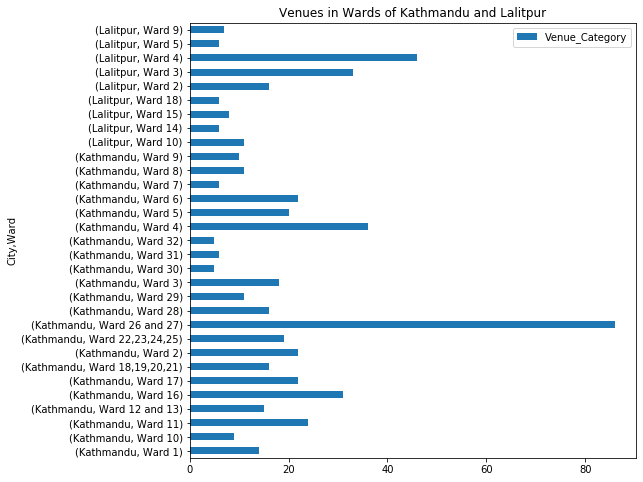

In [249]:
#Venues in wards of Kathmandu and Lalitpur 
Venues_Ktm_L[['Venue_Category']].plot(kind='barh',figsize=(8,8))
plt.title('Venues in Wards of Kathmandu and Lalitpur')

In [73]:
L=len(Ktm_L_Venues['Venue_Category'].unique())
print(f"There are {L} categories")

There are 94 categories


<h3> Categories from four Squares</h3>

As there are many venues sub category we are planning to group these venues in their main category provided by foursquare

In [75]:
#top major categories in  four squares
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()
print(f'There are {len(results["response"]["categories"])} major categories' )

There are 10 major categories


In [76]:
# Let's get only the top-level categories and their IDs and also add them to categories dataframe
categories=pd.DataFrame()
Id=[]
name=[]

for i in range(10):
    Id.append(results['response']['categories'] [i] ['id'])
    name.append(results['response']['categories'] [i] ['name'])
    

In [77]:
#top 10 main categories and their IDs
categories['name']=name
categories['Id']=Id
categories

,name,Id
0,Arts & Entertainment,4d4b7104d754a06370d81259
1,College & University,4d4b7105d754a06372d81259
2,Event,4d4b7105d754a06373d81259
3,Food,4d4b7105d754a06374d81259
4,Nightlife Spot,4d4b7105d754a06376d81259
5,Outdoors & Recreation,4d4b7105d754a06377d81259
6,Professional & Other Places,4d4b7105d754a06375d81259
7,Residence,4e67e38e036454776db1fb3a
8,Shop & Service,4d4b7105d754a06378d81259
9,Travel & Transport,4d4b7105d754a06379d81259


In [78]:
#function to get top 10 categories numbers in each wards
def getnumberofvenues(n_name,n_city,n_lat,n_long,area):

    venues_list=[]
    for n_name,n_city,n_lat,n_long,area in zip (n_name,n_city,n_lat,n_long,area):
        
        
        Radius=round(((float(area)/3.1416)**0.5)*1000)
        b=[n_name,n_city,n_lat,n_long]
        for name,Id in zip(categories.name,categories.Id):
            
            
                 
        
            url=url=f'https://api.foursquare.com/v2/venues/explore?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&ll={n_lat},{n_long}&v={20180225}&radius={Radius}&categoryId={Id}'
            try:
                
                results=requests.get(url).json()['response']['totalResults']
            except:
                print('results')
                
                b.append(0)
            else:
                
                b.append(results)
          
        venues_list.append(b)
        
    total_venues=pd.DataFrame(item for item in venues_list )
    
    return total_venues

In [ ]:
Ktm_L_total_venues=getnumberofvenues(ktm_l['Ward'],ktm_l['City'],ktm_l['latitude'],ktm_l['longitude'],ktm_l['Area(sq km)'])

In [80]:
Ktm_L_total_venues.columns=['Ward','City','latitude','longitude','Arts & Entertainment', 'College & University', 'Event', 'Food',
       'Nightlife Spot', 'Outdoors & Recreation',
       'Professional & Other Places', 'Residence', 'Shop & Service',
       'Travel & Transport']

In [81]:
Ktm_L_total_venues.head()

,Ward,City,latitude,longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Ward 1,Kathmandu,27.712678,85.328703,6,5,0,12,4,8,9,0,3,2
1,Ward 10,Kathmandu,27.692621,85.338072,1,8,0,8,1,3,3,0,10,3
2,Ward 11,Kathmandu,27.695000,85.314900,4,5,1,18,2,3,12,1,7,3
3,Ward 12 and 13,Kathmandu,27.698583,85.299157,2,8,0,9,5,3,5,3,14,5
4,Ward 16,Kathmandu,27.725406,85.305457,3,6,0,16,9,2,6,4,3,39


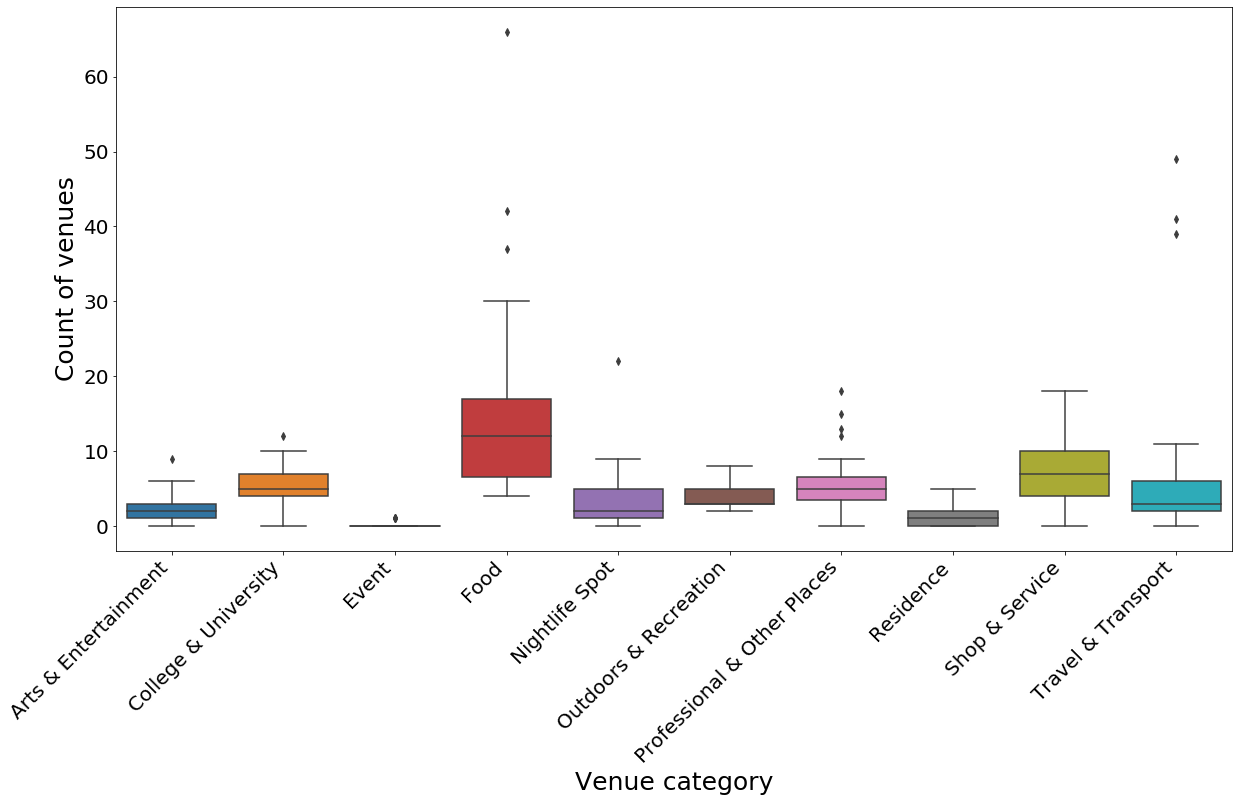

In [266]:
#Top 10 venue Categories distribution
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = Ktm_L_total_venues.drop(['latitude','longitude'],axis=1))
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

We can observe that Food dominates the category where as Shop and services , Outdoors and Creations are leading behing Food. As event venue has no significant data lets drop event category.

<h2> Data Preparation

Lets normalize the data using minmax scaler 

In [253]:
Ktm_L_vneues_count=Ktm_L_total_venues.drop(['Ward','City','latitude','longitude','Event'],axis=1)

In [271]:
Ktm_L_vneues_count.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,6,5,12,4,8,9,0,3,2
1,1,8,8,1,3,3,0,10,3
2,4,5,18,2,3,12,1,7,3
3,2,8,9,5,3,5,3,14,5
4,3,6,16,9,2,6,4,3,39


In [267]:

from sklearn.preprocessing import MinMaxScaler
cluster_dataset = MinMaxScaler().fit_transform(Ktm_L_vneues_count)

In [268]:
Cluster_=pd.DataFrame(cluster_dataset)
Cluster_.columns=['Arts & Entertainment','College & University','Food','Nightlife Spot','Outdoors & Recreation','Professional & Other Places','Residence','Shop & Service','Travel & Transport']

In [269]:
#normalized data
Cluster_

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.666667,0.416667,0.129032,0.181818,1.000000,0.500000,0.0,0.166667,0.040816
1,0.111111,0.666667,0.064516,0.045455,0.166667,0.166667,0.0,0.555556,0.061224
2,0.444444,0.416667,0.225806,0.090909,0.166667,0.666667,0.2,0.388889,0.061224
3,0.222222,0.666667,0.080645,0.227273,0.166667,0.277778,0.6,0.777778,0.102041
4,0.333333,0.500000,0.193548,0.409091,0.000000,0.333333,0.8,0.166667,0.795918
5,1.000000,0.250000,0.419355,0.272727,0.500000,0.222222,0.6,0.166667,0.836735
6,0.000000,0.250000,0.129032,0.181818,0.166667,0.222222,0.0,0.555556,0.081633
7,0.666667,0.416667,0.177419,0.318182,1.000000,0.166667,0.0,0.722222,0.122449
8,0.000000,0.250000,0.209677,0.136364,0.333333,0.333333,0.4,0.388889,0.081633
9,0.444444,0.500000,1.000000,1.000000,0.500000,0.833333,0.8,0.833333,1.000000


Boxplot of Normalized Data

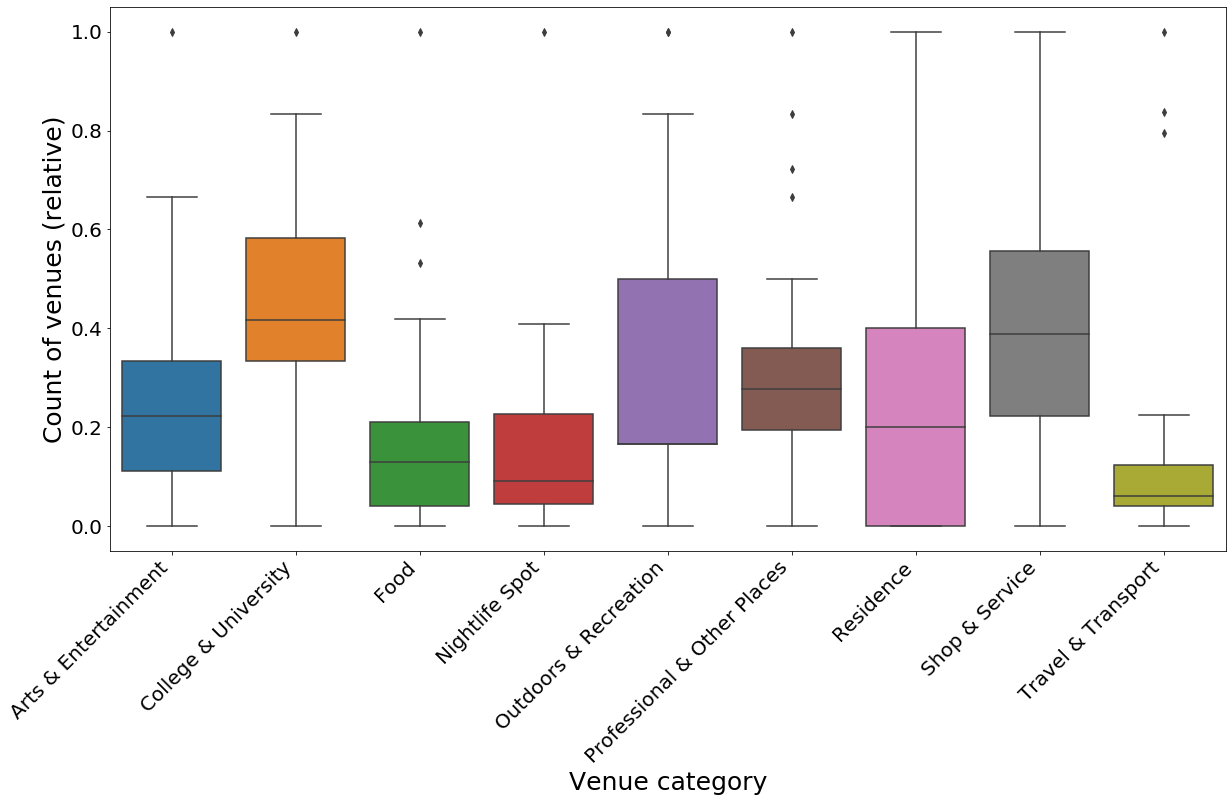

In [270]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data=Cluster_)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()


<h2> Methodology </h2>

Here we are merging the wards with areas less than 0.5 km sq with nearby wards . We are using radius from ward area to search nearby venues . Also we have filtered out wards with venues number less than 5 to get clear analysis . We are analysing wards on the basis of top 10 categories numbers present in each ward 

<h2> Clustering </h2>

We are going to use KMeans Clustering for clustering the wards of Kathmandu and Lalitpur based on the scaled top categories data of each ward.

Preliminary reults for different number of clusters
1. k=2   :  shows only high number and low number of venues 
2. k=3   :  clusters with high number of colleges , low number of venues and third one is hard to interpret 
3. k=4   :  clusters with high number of colleges, another one with high number of outdoors and reamaining two with high and                low number venues 
4. k=5   :  hard to interpret

We choose k=4 for our analysis of wards clusters


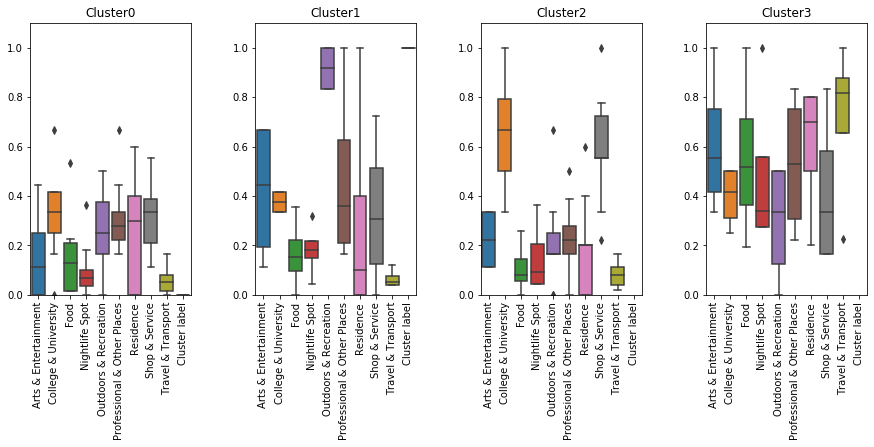

In [213]:
#clustering wards with k=4 number of clusters 
k=4

kMeans=KMeans(n_clusters=k,random_state=0).fit(Cluster_)
Cluster_['Cluster label']=kMeans.labels_

#box plot for all four clusters
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(k):
    
   
    ax = fig.add_subplot(1, k, i+1)
    ax.set(ylim=(0,1.1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    sns.boxplot(data=Cluster_[Cluster_['Cluster label']==i])
    plt.title(f'Cluster{i}')
plt.show()


We can observe from box plot that
<li> Cluster 0 : Diverse but low venues cluster </li>
<li> Cluster 1: Outdoors, Creation , Arts and Entertainment Cluster
<li>Cluster 2: Colleges,universities,shops and services Cluster
<li>Cluster 3: Diverse and high venues cluster


<h2> Top 5 venues for each Wards <h2>

In [121]:
#one hot encoding the venues categories from venues of each wards datframe
Ktm_L_onehot=pd.get_dummies(Ktm_L_Venues[['Venue_Category']],prefix="",prefix_sep='')

In [122]:
Ktm_L_onehot['Ward']=Ktm_L_Venues['Ward']
Ktm_L_onehot['City']=Ktm_L_Venues['City']

In [123]:
Ktm_L_groups=Ktm_L_onehot.groupby(['City','Ward']).mean().reset_index()

In [258]:
#function to return top number venues for each ward
def most_common_venues(row,n):
    row_categories=row.iloc[2:]
    row_sorted=row_categories.sort_values(ascending=False)
    return row_sorted.index.values[0:n]

In [196]:
#sorting out top 5 venues for each ward
columns=[]
num_top_venues=5
indicators=['st','nd','rd']
columns=['Ward','City']

for i in range(num_top_venues):
    try:
        columns.append(f'{i+1}{indicators[i]} Most common venue')
    except:
        columns.append(f'{i+1} th Most common venue')
        
Ktm_L_wards=pd.DataFrame()
Ktm_L_wards=pd.DataFrame(columns=columns)
Ktm_L_wards['Ward']=Ktm_L_groups['Ward']
Ktm_L_wards['City']=Ktm_L_groups['City']

for i in range(Ktm_L_groups.shape[0]):
    Ktm_L_wards.iloc[i,2:]=most_common_venues(Ktm_L_groups.iloc[i,:],num_top_venues)
    
Ktm_L_wards.head()

,Ward,City,1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue
0,Ward 1,Kathmandu,Asian Restaurant,Hotel,Shopping Mall,Bar,Burger Joint
1,Ward 10,Kathmandu,Fast Food Restaurant,Restaurant,Café,Bus Stop,Hotel
2,Ward 11,Kathmandu,Café,Shopping Mall,Multiplex,Indian Restaurant,Coffee Shop
3,Ward 12 and 13,Kathmandu,Hotel,Asian Restaurant,Café,Bus Station,Indian Restaurant
4,Ward 16,Kathmandu,Hotel,Asian Restaurant,Restaurant,Bus Station,Soccer Stadium


In [197]:
#merging top 5 venues for each ward in the Kathmandu and Lalitpur wards details dataset
Ktm_Lalitpur_wards=ktm_llt.merge(Ktm_L_wards.set_index(['Ward','City']), on=['Ward','City'])

In [199]:
Ktm_Lalitpur_wards.head()

,,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,Location,latitude,longitude,Area(sq km),Population Density (per sq km),1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue
Ward,City,,,,,,,,,,,,,,,,
Ward 1,Kathmandu,14,14,14,14,14,14,Naxal,27.712678,85.328703,1.3818,5795.0,Asian Restaurant,Hotel,Shopping Mall,Bar,Burger Joint
Ward 10,Kathmandu,9,9,9,9,9,9,New Baneshwor,27.692621,85.338072,1.5643,25455.0,Fast Food Restaurant,Restaurant,Café,Bus Stop,Hotel
Ward 11,Kathmandu,24,24,24,24,24,24,Tripureshwor,27.695000,85.314900,1.8126,9801.0,Café,Shopping Mall,Multiplex,Indian Restaurant,Coffee Shop
Ward 12 and 13,Kathmandu,15,15,15,15,15,15,Kalimati,27.698583,85.299157,2.7843,19293.0,Hotel,Asian Restaurant,Café,Bus Station,Indian Restaurant
Ward 16,Kathmandu,31,31,31,31,31,31,Sohrakhutte,27.725406,85.305457,4.6335,18224.0,Hotel,Asian Restaurant,Restaurant,Bus Station,Soccer Stadium


In [214]:
#adding cluster label to each corresponding ward
Ktm_Lalitpur_wards['Cluster label']=kMeans.labels_

In [201]:
Ktm_Lalitpur_wards.head()

,,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,Location,latitude,longitude,Area(sq km),Population Density (per sq km),1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue,Cluster label
Ward,City,,,,,,,,,,,,,,,,,
Ward 1,Kathmandu,14,14,14,14,14,14,Naxal,27.712678,85.328703,1.3818,5795.0,Asian Restaurant,Hotel,Shopping Mall,Bar,Burger Joint,2
Ward 10,Kathmandu,9,9,9,9,9,9,New Baneshwor,27.692621,85.338072,1.5643,25455.0,Fast Food Restaurant,Restaurant,Café,Bus Stop,Hotel,1
Ward 11,Kathmandu,24,24,24,24,24,24,Tripureshwor,27.695000,85.314900,1.8126,9801.0,Café,Shopping Mall,Multiplex,Indian Restaurant,Coffee Shop,0
Ward 12 and 13,Kathmandu,15,15,15,15,15,15,Kalimati,27.698583,85.299157,2.7843,19293.0,Hotel,Asian Restaurant,Café,Bus Station,Indian Restaurant,1
Ward 16,Kathmandu,31,31,31,31,31,31,Sohrakhutte,27.725406,85.305457,4.6335,18224.0,Hotel,Asian Restaurant,Restaurant,Bus Station,Soccer Stadium,3


In [217]:
#labelling each ward clusters
Ktm_Lalitpur_wards['Cluster']=Ktm_Lalitpur_wards['Cluster label'].apply(lambda x:'Diverse but Low venues region'
                                                                        if x==0 else ('Shops, Services and Colleges region' 
                                                                                      if x==2 else ('Outdoors,Recreation and Entertainment region'if x==1 else
                                                                                                  'Diverse and High venues region ' )))

<h2> Assigning Population Density label for each ward <h2>

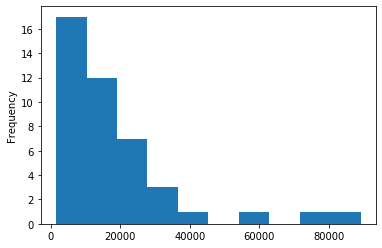

In [204]:
ktm_Lalitpur['Population Density (per sq km)'].plot(kind='hist')

<li> >20,000=Low level Population Density
<li>  20000-40000= Lower Mid level 1 Population Density
<li>  40,000-60,000= Higher Mid level 2 Population Density
<li>  60,000-80,000=High level  Population Density
<li> >80,000=Very high level Population Density


In [ ]:
Ktm_Lalitpur_wards.reset_index(inplace=True)
Ktm_Lalitpur_wards.drop(['Latitude', 'Longitude', 'Venue', 'Venue_Latitude',
       'Venue_Longitude', 'Venue_Category'],axis=1,inplace=True)

In [207]:
Ktm_Lalitpur_wards.head()

,Ward,City,Location,latitude,longitude,Area(sq km),Population Density (per sq km),1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue,Cluster label,Cluster
0,Ward 1,Kathmandu,Naxal,27.712678,85.328703,1.3818,5795.0,Asian Restaurant,Hotel,Shopping Mall,Bar,Burger Joint,2,"Outdoors,Recreation and Entertainment region"
1,Ward 10,Kathmandu,New Baneshwor,27.692621,85.338072,1.5643,25455.0,Fast Food Restaurant,Restaurant,Café,Bus Stop,Hotel,1,"Shops, Services and Colleges region"
2,Ward 11,Kathmandu,Tripureshwor,27.695000,85.314900,1.8126,9801.0,Café,Shopping Mall,Multiplex,Indian Restaurant,Coffee Shop,0,Diverse but Low venues region
3,Ward 12 and 13,Kathmandu,Kalimati,27.698583,85.299157,2.7843,19293.0,Hotel,Asian Restaurant,Café,Bus Station,Indian Restaurant,1,"Shops, Services and Colleges region"
4,Ward 16,Kathmandu,Sohrakhutte,27.725406,85.305457,4.6335,18224.0,Hotel,Asian Restaurant,Restaurant,Bus Station,Soccer Stadium,3,Diverse and High venues region


In [208]:
Ktm_Lalitpur_wards['Population Density']=Ktm_Lalitpur_wards['Population Density (per sq km)'].apply(lambda x:'Low level Population Density' if x<=20000
                                                                        else ('Lower Mid level Population Density' if (x>20000 and x<=40000)
                                                                              else ('Higher Mid level  Population Denisty' if (x>40000 and x<=60000) 
                                                                                    else('High level  Population Denisty' if 
                                                                                         (x>60000 and x<=80000)
                                                                                         else'Very high level Population Denisty'))))

In [211]:
Ktm_Lalitpur_wards.head()


,Ward,City,Location,latitude,longitude,Area(sq km),Population Density (per sq km),1st Most common venue,2nd Most common venue,3rd Most common venue,4 th Most common venue,5 th Most common venue,Cluster label,Cluster,Population Density
0,Ward 1,Kathmandu,Naxal,27.712678,85.328703,1.3818,5795.0,Asian Restaurant,Hotel,Shopping Mall,Bar,Burger Joint,2,"Outdoors,Recreation and Entertainment region",Low level Population Density
1,Ward 10,Kathmandu,New Baneshwor,27.692621,85.338072,1.5643,25455.0,Fast Food Restaurant,Restaurant,Café,Bus Stop,Hotel,1,"Shops, Services and Colleges region",Lower Mid level Population Density
2,Ward 11,Kathmandu,Tripureshwor,27.695000,85.314900,1.8126,9801.0,Café,Shopping Mall,Multiplex,Indian Restaurant,Coffee Shop,0,Diverse but Low venues region,Low level Population Density
3,Ward 12 and 13,Kathmandu,Kalimati,27.698583,85.299157,2.7843,19293.0,Hotel,Asian Restaurant,Café,Bus Station,Indian Restaurant,1,"Shops, Services and Colleges region",Low level Population Density
4,Ward 16,Kathmandu,Sohrakhutte,27.725406,85.305457,4.6335,18224.0,Hotel,Asian Restaurant,Restaurant,Bus Station,Soccer Stadium,3,Diverse and High venues region,Low level Population Density


In [274]:

#Plotting Kathmandu and Lalitpur Wards on basis of their cluster with information on top 3 venues , 
#cluster label and population density

map_LK=folium.Map(location=[27.6862,85.3149],zoom_start=12.1)
color=['Green','Blue','Brown','Red']
for lat,long,loc,ward,city,cls,density,cl,f,s,t in zip(Ktm_Lalitpur_wards.latitude,Ktm_Lalitpur_wards.longitude,
                         Ktm_Lalitpur_wards.Location,Ktm_Lalitpur_wards.Ward,Ktm_Lalitpur_wards.City,
                                            Ktm_Lalitpur_wards.Cluster,
                        Ktm_Lalitpur_wards['Population Density'],Ktm_Lalitpur_wards['Cluster label'],
                                                 Ktm_Lalitpur_wards['1st Most common venue'],
                                                 Ktm_Lalitpur_wards['2nd Most common venue'],
                                                 Ktm_Lalitpur_wards['3rd Most common venue']
                                        ):
    label=f'{loc},{ward},{city} / Cluster: {cls} /  {density} / \n Popular Venues:{f} , {s} , {t}'
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,long],
    radius=5,
    popup=label,
    cmap='rainbow',
    color=color[cl],
    fill_color=color[cl],
    fill=True,
    
    fill_opacity='0.5',
    parse_html=True).add_to(map_LK)
    


from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=2">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:10px; padding: 20px; font-size:15px; right: 30px; bottom: 10px;'>
     
<div class='legend-title'>Cluster Label</div>
<div class='legend-scale'>
  <ul class='legend-labels'>

    <li><span style='background:green;opacity:0.7;'></span>Diverse but Low venues region</li>
    <li><span style='background:blue;opacity:0.7;'></span>Outdoors,Recreation and Entertainment Region</li>
    <li><span style='background:brown;opacity:0.7;'></span>Shops,Services and Colleges Region</li>
    <li><span style='background:red;opacity:0.7;'></span>Diverse and high venues region</li>




<div class='legend-title'>Population Density (per sq km)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li>Low level Population Density : <20,000 </li>
    <li>Lower Mid level  Population Density : 20,000-40,000 </li>
    <li>Higher Mid level Population Denisty : 40,000-60,000</li>
    <li>High level Population Denisty : 60,000-80,000</li>
    <li> Very High level Population Denisty : >80,000</li>

               
    

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""



macro = MacroElement()
macro._template = Template(template)

map_LK.get_root().add_child(macro)

map_LK



<h2> Results </h2>
    
Clustering different clustered wards in map shows us that most of the diverse but low venues region lies in the outskirt of combined Lalitpur and Kathmandu city whereas center of both cities and combined city do consist high venues and specific venues region. We can observe both cities wards mirroring each other at many mirror geographical locations  The population density gives us further insight on the wards residential and market situation .

<h2> Discussion </h2>

The four square data are insightful but not all-encompassing especially for country like Nepal where digital platform use and accessibility has just begin to boom . We can observe that many wards have low numbers of venues in four square API which certainly doesn’t coincide with the actual number of venues. Also the four square venue data focus on category it doesn’t include the magnitude of venue. As we can see that a park certainly attracts more magnitude of in comparison to a restaurant.

<h2> Conclusion </h2>
 
We can deploy tools like this in far greater scale with more features like housing rate, air quality rate to study our cities and other regions in greater details.
Not only for people seeking out their favorite neighborhood, these sort of analysis can even significantly benefit parties like administration, businesses groups and real estate investors.


